<a href="https://colab.research.google.com/github/FabioRochaPoeta/aprendizado-nao-supervisionado/blob/main/An%C3%A1lise_n%C3%A3o_supervisionada_K_M%C3%A9dias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
wines = pd.read_csv("winequalityN.csv")

In [ ]:
wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wines = wines.dropna()

In [ ]:
X1 = 'chlorides'
X2 = 'total sulfur dioxide'
wines = wines[['type', X1, X2]]

In [ ]:
wines

reds = wines[wines.type == 'red']
whites = wines[wines.type == 'white']

(0.0, 500.0)

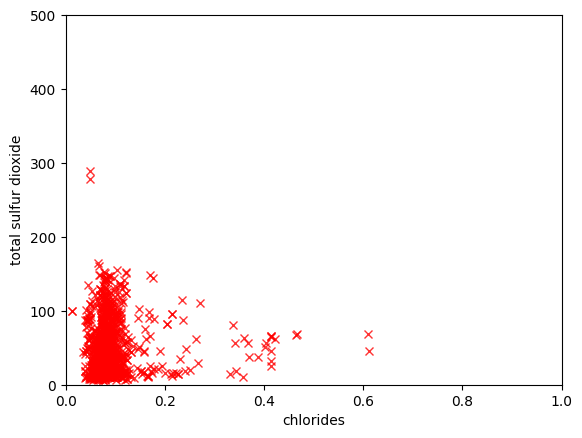

In [ ]:
import matplotlib.pyplot as plt


plt.plot(reds[X1], reds[X2], 'x', c='r', alpha=0.8)

plt.xlabel(X1)
plt.ylabel(X2)
plt.xlim([0, 1])
plt.ylim([0, 500])

(0.0, 500.0)

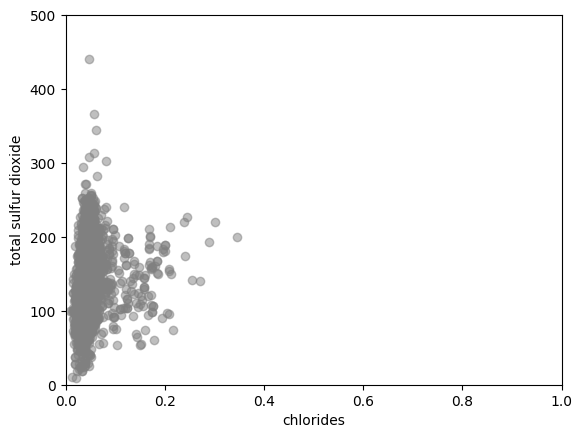

In [ ]:
plt.plot(whites[X1], whites[X2], 'o', c='gray', alpha=0.5)
plt.xlabel(X1)
plt.ylabel(X2)
plt.xlim([0, 1])
plt.ylim([0, 500])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
model = KMeans(
    n_clusters=2,
    n_init=100,
    max_iter=1000
)
scaler = StandardScaler()
wines_scaled = scaler.fit_transform(wines[[X1, X2]])

model.fit(wines_scaled)

KMeans(max_iter=1000, n_clusters=2, n_init=100)

In [ ]:
clusters = model.predict(wines_scaled)

wines['clusters'] = clusters

Text(0, 0.5, 'total sulfur dioxide')

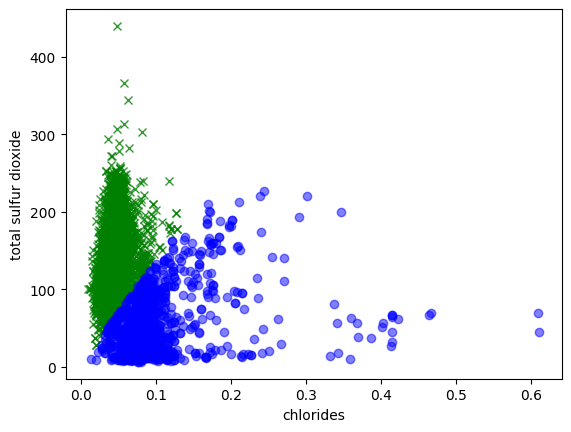

In [ ]:
plt.plot(wines[clusters==0][X1], wines[clusters==0][X2], 'x', c='g', alpha=0.8)
plt.plot(wines[clusters==1][X1], wines[clusters==1][X2], 'o', c='b', alpha=0.5)

plt.xlabel(X1)
plt.ylabel(X2)